# 0. Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

## 0.1 Load Data

In [2]:
df_raw = pd.read_csv('df_ready.csv')

In [3]:
cols_to_drop = ['Unnamed: 0', 'Date_imp', 'Cluster', 'condition', 'sourceURLs', 'Date_imp_d.1', 
                'Zscore_1', 'price_std', 'imageURLs', 'shipping', 'weight', 'currency' ]

df_raw = df_raw.drop(cols_to_drop, axis=1)



# 1.0 Data Description

In [4]:
df1 = df_raw.copy()

## 1.1 Rename Columns

In [5]:
cols_name = ['date_imp', 'category_name', 'name', 'price', 'disc_price',
       'merchant', 'disc_percentage', 'is_sale', 'imp_count', 'brand',
       'p_description', 'dateadded', 'dateseen', 'dateupdated', 'manufacturer',
       'day_n', 'month', 'month_n', 'day', 'week_number']

df1.columns = cols_name

## 1.2 Data Dimensions

In [6]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Columns: {}'.format(df1.shape[1]))

Number of Rows: 23151
Number of Columns: 20


## 1.3 Data Types

In [7]:
df1.dtypes

date_imp            object
category_name       object
name                object
price              float64
disc_price         float64
merchant            object
disc_percentage    float64
is_sale             object
imp_count            int64
brand               object
p_description       object
dateadded           object
dateseen            object
dateupdated         object
manufacturer        object
day_n               object
month                int64
month_n             object
day                  int64
week_number          int64
dtype: object

In [8]:
df1['date_imp'] = pd.to_datetime(df1['date_imp'])

## 1.4 Check N/A

In [9]:
df1.isna().sum()

date_imp               0
category_name          0
name                   0
price                  0
disc_price             0
merchant               0
disc_percentage        0
is_sale                0
imp_count              0
brand                  0
p_description          0
dateadded              0
dateseen               0
dateupdated            0
manufacturer       10639
day_n                  0
month                  0
month_n                0
day                    0
week_number            0
dtype: int64

## 1.5 Descriptive Statistics

In [10]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=(['int64', 'float64', 'datetime64[ns]']))

### 1.5.1 Numerical Attributes

In [11]:
#min, max, mean, median, std, range

d1 = pd.DataFrame(num_attributes.min()).T
d2 = pd.DataFrame(num_attributes.max()).T
d3 = pd.DataFrame(num_attributes.mean()).T
d4 = pd.DataFrame(num_attributes.median()).T
d5 = pd.DataFrame(num_attributes.std()).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min() )).T

m = pd.concat([d1, d2, d3, d4, d5, d6]).T
m.columns = (['min', 'max', 'mean', 'median', 'std', 'range'])

m

,min,max,mean,median,std,range
price,1.0,10879.95,513.037803,199.99,859.110002,10878.95
disc_price,1.0,10879.95,494.104295,199.00,808.588973,10878.95
disc_percentage,0.0,0.80,0.016933,0.00,0.077849,0.80
imp_count,1.0,31.00,6.560926,5.00,5.403166,30.00
month,1.0,12.00,7.651030,8.00,2.592843,11.00
day,1.0,31.00,15.693879,16.00,9.681622,30.00
week_number,1.0,51.00,31.342750,32.00,11.316498,50.00


In [12]:
num_attributes.describe()

,price,disc_price,disc_percentage,imp_count,month,day,week_number
count,23151.000000,23151.000000,23151.000000,23151.000000,23151.000000,23151.000000,23151.000000
mean,513.037803,494.104295,0.016933,6.560926,7.651030,15.693879,31.342750
std,859.110002,808.588973,0.077849,5.403166,2.592843,9.681622,11.316498
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,82.990000,79.990000,0.000000,2.000000,6.000000,7.000000,23.000000
50%,199.990000,199.000000,0.000000,5.000000,8.000000,16.000000,32.000000
75%,540.000000,516.490000,0.000000,10.000000,9.000000,24.000000,38.000000
max,10879.950000,10879.950000,0.800000,31.000000,12.000000,31.000000,51.000000


# 2.0 EDA

In [13]:
df2 = df1.copy()

## 2.2 What is the best-selling category?

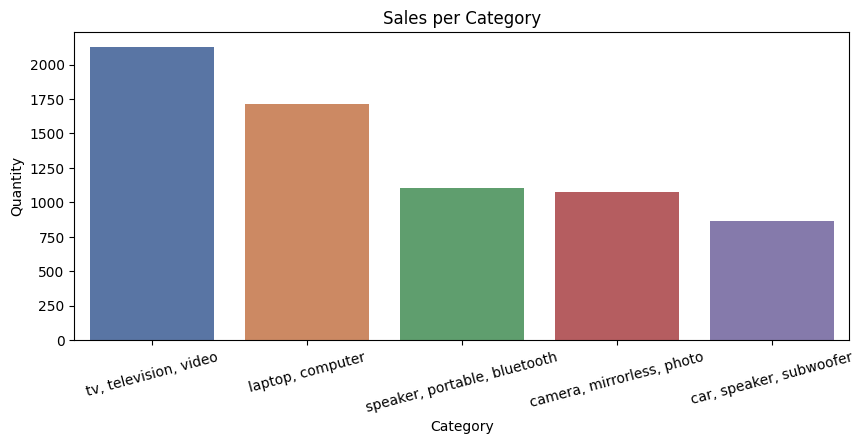

In [14]:
plt.figure(figsize=(10, 4))
df_aux = df2[['date_imp', 'category_name']].groupby('category_name').count().sort_values('date_imp', ascending=False).head(5).reset_index()
sns.barplot(data= df_aux, x= 'category_name', y='date_imp', palette='deep')

plt.xticks(rotation=15)
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.title('Sales per Category');

### 2.2.1 What are the best-selling Categories by store?

In [15]:
df_aux = df2[['merchant', 'category_name', 'date_imp']].groupby(['merchant', 'category_name']).count()
idx = df_aux.groupby('merchant')['date_imp'].idxmax()

df_aux = df_aux.loc[idx].sort_values('date_imp', ascending=False).reset_index()
df_aux


,merchant,category_name,date_imp
0,Bestbuy.com,"laptop, computer",1071
1,ebay.com,"tv, television, video",820
2,bhphotovideo.com,"camera, mirrorless, photo",556
3,Walmart.com,"tv, television, video",523
4,Amazon.com,"tablet, ipad, computer",14
5,kmart.com,"laptop, computer",10
6,barcodable.com,"computer, charger, laptop",2


## 2.3 What is the best-selling brand?

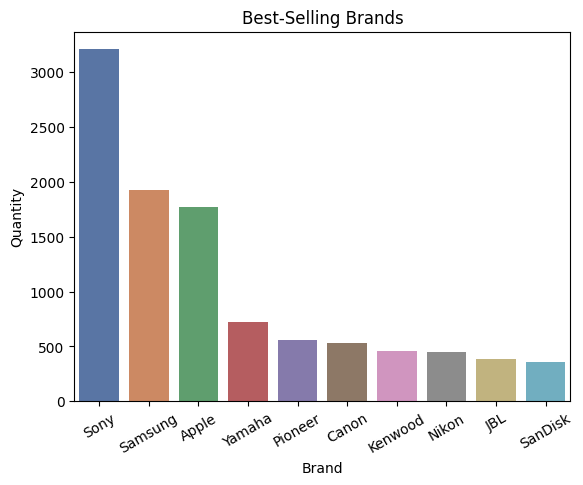

In [16]:
df_aux = df2[['date_imp', 'brand']].groupby('brand').count().sort_values('date_imp', ascending=False).head(10).reset_index()

sns.barplot(data= df_aux, x='brand', y='date_imp', palette='deep' )
plt.xticks(rotation=30)
plt.xlabel('Brand')
plt.ylabel('Quantity')
plt.title('Best-Selling Brands');

### 2.3.1 What is the most sold brand per store?

In [17]:
df_aux = df2[['merchant', 'date_imp', 'brand']].groupby(['merchant', 'brand']).count()
idx = df_aux.groupby('merchant')['date_imp'].idxmax()

df_aux.loc[idx].sort_values('date_imp', ascending=False).reset_index()

,merchant,brand,date_imp
0,Bestbuy.com,Sony,1382
1,bhphotovideo.com,Sony,961
2,Walmart.com,Samsung,521
3,ebay.com,Sony,495
4,Amazon.com,Amazon,25
5,kmart.com,HP,10
6,barcodable.com,Dell,2


## 2.4 Which days sell the most?

Text(0.5, 1.0, 'Sales by Day of Week')

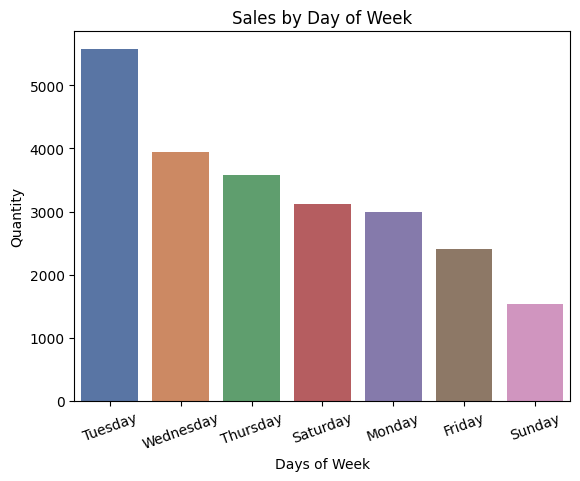

In [18]:
df_aux = df2[['day_n', 'date_imp']].groupby('day_n').count().sort_values('date_imp', ascending=False).reset_index()

sns.barplot(data= df_aux, x='day_n', y='date_imp', palette='deep')
plt.xticks(rotation=20)
plt.xlabel('Days of Week')
plt.ylabel('Quantity')
plt.title('Sales by Day of Week')

### 2.4.1 Which days do the stores sell the most?

In [19]:
df_aux = df2[['merchant', 'day_n', 'date_imp']].groupby(['merchant', 'day_n']).count()
idx = df_aux.groupby('merchant')['date_imp'].idxmax()
df_aux = df_aux.loc[idx].sort_values('date_imp', ascending=False).reset_index()
df_aux

,merchant,day_n,date_imp
0,Bestbuy.com,Tuesday,2859
1,bhphotovideo.com,Tuesday,1539
2,Walmart.com,Sunday,783
3,ebay.com,Tuesday,586
4,Amazon.com,Tuesday,8
5,kmart.com,Sunday,6
6,barcodable.com,Tuesday,2


## 2.5 Which months sell the most?

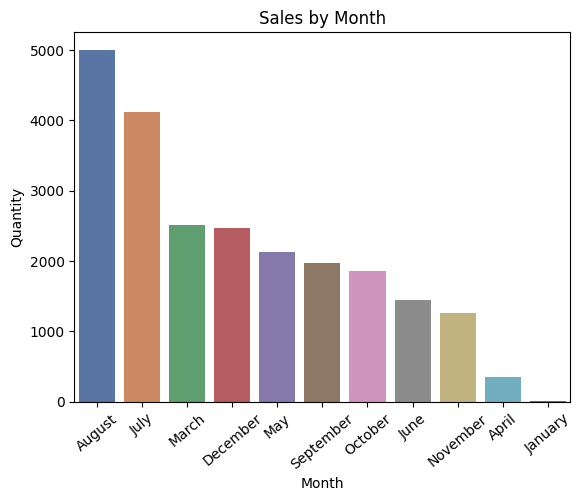

In [20]:
df_aux = df2[['month_n', 'date_imp']].groupby('month_n').count().sort_values('date_imp', ascending=False).reset_index()

sns.barplot(data= df_aux, x= 'month_n', y= 'date_imp', palette= 'deep')
plt.xticks(rotation=40)
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Sales by Month');

### 2.5.1 Which months sell the most per store?

In [21]:
df_aux = df2[['merchant', 'month_n', 'date_imp']].groupby(['merchant', 'month_n']).count()
idx = df_aux.groupby('merchant')['date_imp'].idxmax()
df_aux = df_aux.loc[idx].sort_values('date_imp', ascending=False).reset_index()
df_aux

,merchant,month_n,date_imp
0,Bestbuy.com,August,2520
1,bhphotovideo.com,December,1998
2,ebay.com,July,1755
3,Walmart.com,July,968
4,kmart.com,July,17
5,Amazon.com,May,8
6,barcodable.com,August,1


## 2.6 Which weeks sell the most?

Text(0.5, 1.0, 'Sales by Week')

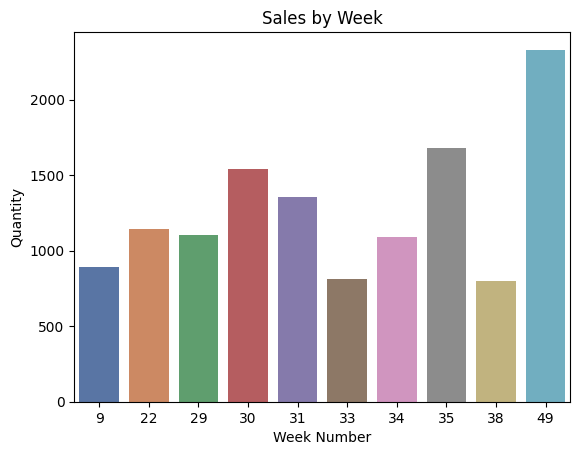

In [22]:
df_aux = df2[['week_number', 'date_imp']].groupby('week_number').count().sort_values('date_imp', ascending=False).head(10).reset_index()

sns.barplot(data= df_aux, x='week_number', y= 'date_imp', palette='deep')
plt.xlabel('Week Number')
plt.ylabel('Quantity')
plt.title('Sales by Week')

### 2.6.1 Which weeks sell the most per store?

In [23]:
df_aux = df2[['week_number', 'merchant', 'date_imp']].groupby(['merchant', 'week_number']).count()
idx = df_aux.groupby('merchant')['date_imp'].idxmax()

df_aux = df_aux.loc[idx].sort_values('date_imp', ascending=False).reset_index()
df_aux

,merchant,week_number,date_imp
0,bhphotovideo.com,49,1998
1,Bestbuy.com,31,1354
2,ebay.com,30,657
3,Walmart.com,29,576
4,kmart.com,26,11
5,Amazon.com,9,2
6,barcodable.com,30,1


# 3.0 Feature Engineering - Defining Elasticity Dataset

In [24]:
df3 = df2.copy()

In [25]:
# Defining Category and Merchant
df_laptop = df3.query('merchant == "Bestbuy.com" & category_name == "laptop, computer"')

In [26]:
# Taking mean price and demand for selected merchant and category, by week
df_test = df_laptop.groupby(['name', 'week_number']).agg({'disc_price': 'mean', 'date_imp': 'count'}).reset_index()
df_test.head()

,name,week_number,disc_price,date_imp
0,"12 MacBook (Mid 2017, Gold)",30,1599.99,1
1,"12 MacBook (Mid 2017, Gold)",31,1551.99,8
2,"12 MacBook (Mid 2017, Gold)",33,1454.99,2
3,"12 MacBook (Mid 2017, Gold)",34,1551.99,2
4,"12 MacBook (Mid 2017, Gold)",35,1474.49,4


In [27]:
# Creating X Dataframe
x_price = df_test.pivot(index= 'week_number', columns= 'name', values= 'disc_price')
x_price = pd.DataFrame(x_price.to_records())
x_price.head()

,week_number,"12 MacBook (Mid 2017, Gold)","12 MacBook (Mid 2017, Silver)",12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,"13.3 MacBook Air (Mid 2017, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",Acer 15.6 Chromebook CB5-571-C4G4,...,"HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black""","HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10""","Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue""","Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS""","Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1","Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB""","MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black""","New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10""","Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black""","Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"""
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,NaN,NaN,426.495,NaN,2799.99,2599.99,NaN,899.99,236.495,...,799.99,499.99,NaN,664.99,379.99,316.99,NaN,807.49,NaN,617.49
2,10,NaN,NaN,426.495,NaN,2799.99,2599.99,NaN,899.99,238.995,...,819.99,429.99,229.99,664.99,474.99,335.99,NaN,949.99,NaN,617.49
3,11,NaN,NaN,NaN,NaN,2715.99,2482.99,NaN,NaN,NaN,...,819.99,NaN,218.49,NaN,474.99,383.99,NaN,NaN,NaN,569.99
4,13,NaN,NaN,449.000,NaN,2547.99,2353.99,NaN,849.99,223.995,...,819.99,499.99,203.49,636.99,444.99,369.99,2399.99,909.99,NaN,591.49


In [28]:
# Creating Y DataFrame
y_demand = df_test.pivot(index= 'week_number', columns= 'name', values= 'date_imp')
y_demand = pd.DataFrame(y_demand.to_records())
y_demand.head()

,week_number,"12 MacBook (Mid 2017, Gold)","12 MacBook (Mid 2017, Silver)",12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,"13.3 MacBook Air (Mid 2017, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",Acer 15.6 Chromebook CB5-571-C4G4,...,"HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black""","HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10""","Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue""","Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS""","Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1","Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB""","MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black""","New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10""","Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black""","Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"""
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,NaN,NaN,4.0,NaN,3.0,6.0,NaN,2.0,4.0,...,1.0,2.0,NaN,4.0,4.0,4.0,NaN,4.0,NaN,2.0
2,10,NaN,NaN,2.0,NaN,1.0,4.0,NaN,1.0,2.0,...,1.0,1.0,1.0,2.0,2.0,2.0,NaN,2.0,NaN,2.0
3,11,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,NaN,...,1.0,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,2.0
4,13,NaN,NaN,1.0,NaN,2.0,8.0,NaN,1.0,2.0,...,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,NaN,2.0


Replace N/A

In [29]:
# Filling N/A with median price
a = np.round(x_price.median(), 2)
x_price.fillna(a, inplace=True)

# Filling N/A for demand with 0
y_demand.fillna(0, inplace=True)

# 4.0 Machine Learning

## 4.1 Selecting Products with P-Value < 0.05

In [61]:
products = []
for column in x_price.columns[1:]:
    products.append(column)

In [81]:
import statsmodels.api as sm

results_values_laptop = {
'name': [],
'elasticity': [],
'p-value': [],
'slope': [],
'r-squared': [],
'mean_price': [],
'mean_quantity': []
}

products_final = []
for i in products:

    x_laptop = x_price[i]
    y_laptop = y_demand[i]
    X_laptop = sm.add_constant(x_laptop)
    model = sm.OLS(y_laptop, X_laptop)

    results = model.fit()
    if results.f_pvalue < 0.05:
        products_final.append(i)

        intercept, slope = results.params
        mean_price = np.mean(x_laptop)
        mean_quantity = np.mean(y_laptop)
        price_elasticity = slope* (mean_price / mean_quantity)

        results_values_laptop['name'].append(i)
        results_values_laptop['elasticity'].append(price_elasticity)
        results_values_laptop['p-value'].append(results.f_pvalue)
        results_values_laptop['slope'].append(slope)
        results_values_laptop['r-squared'].append(results.rsquared)
        results_values_laptop['mean_price'].append(mean_price)
        results_values_laptop['mean_quantity'].append(mean_quantity)

    df_elasticity = pd.DataFrame(results_values_laptop).sort_values('elasticity', ascending=True)

df_elasticity

,name,elasticity,p-value,slope,r-squared,mean_price,mean_quantity
5,Details About Apple Macbook Air 13.3 Laptop (e...,-68.165723,0.000041,-0.032957,0.510312,795.509231,0.384615
0,"12 MacBook (Mid 2017, Silver)",-65.115595,0.023508,-0.019325,0.196027,1295.990000,0.384615
4,Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...,-23.203537,0.002237,-0.038372,0.327839,790.759231,1.307692
1,ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...,-16.039643,0.005251,-0.028816,0.281984,299.720769,0.538462
2,Acer 15.6 Chromebook CB5-571-C4G4,-8.432545,0.041743,-0.026751,0.161645,242.479231,0.769231
6,Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...,-6.049399,0.005677,-0.027743,0.277667,209.663077,0.961538
3,Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...,-6.018642,0.011774,-0.003404,0.236464,1224.221154,0.692308


# 5.0 Business Performance

In [ ]:
results_revenue = {
        'name': [],
        'current_revenue': [],
        'reducing_revenue':[],
        'loss_revenue':[],
        'new_revenue':[],
        'variation_in_revenue':[],
        'percentage_variation':[]
}

for i in range(len(df_elasticity)):
    current_mean_price  = x_price[df_elasticity['name'][i]].mean()
    current_demand = y_demand[df_elasticity['name'][i]].sum()

    price_reducing = current_mean_price * 0.9
    demand_increasing = -0.1* df_elasticity['elasticity'][i]

    new_demand = demand_increasing * current_demand

    current_revenue = round(current_mean_price * current_demand, 2)
    new_revenue = round(price_reducing * new_demand, 2)

    reducing_revenue = round(current_revenue *0.9, 2)
    loss_revenue = round(current_revenue - reducing_revenue, 2)

    revenue_variation = round(new_revenue - current_revenue, 2)
    percentage_variation = round(((new_revenue - current_revenue) / current_revenue), 2)

    results_revenue['name'].append(df_elasticity['name'][i])
    results_revenue['current_revenue'].append(current_revenue)
    results_revenue['reducing_revenue'].append(reducing_revenue)
    results_revenue['loss_revenue'].append(loss_revenue)
    results_revenue['new_revenue'].append(new_revenue)
    results_revenue['variation_in_revenue'].append(revenue_variation)
    results_revenue['percentage_variation'].append(percentage_variation)

results = pd.DataFrame(results_revenue)

## New revenues and variations after suggested price reduction

In [84]:
results

,name,current_revenue,reducing_revenue,loss_revenue,new_revenue,variation_in_revenue,percentage_variation
0,"12 MacBook (Mid 2017, Silver)",12959.90,11663.91,1295.99,75950.24,62990.34,4.86
1,ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...,4196.09,3776.48,419.61,6057.34,1861.25,0.44
2,Acer 15.6 Chromebook CB5-571-C4G4,4849.58,4364.62,484.96,3680.49,-1169.09,-0.24
3,Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...,22035.98,19832.38,2203.60,11936.40,-10099.58,-0.46
4,Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...,26885.81,24197.23,2688.58,56146.14,29260.33,1.09
5,Details About Apple Macbook Air 13.3 Laptop (e...,7955.09,7159.58,795.51,48803.82,40848.73,5.13
6,Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...,5241.58,4717.42,524.16,2853.75,-2387.83,-0.46
